<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Overview</a></span></li><li><span><a href="#Dimensionality-reduction" data-toc-modified-id="Dimensionality-reduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dimensionality reduction</a></span><ul class="toc-item"><li><span><a href="#Dimensionality-reduction-using-PCA" data-toc-modified-id="Dimensionality-reduction-using-PCA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dimensionality reduction using PCA</a></span></li><li><span><a href="#Dimensionality-reduction-using-t-SNE" data-toc-modified-id="Dimensionality-reduction-using-t-SNE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dimensionality reduction using t-SNE</a></span></li><li><span><a href="#PCA-&amp;-t-SNE" data-toc-modified-id="PCA-&amp;-t-SNE-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>PCA &amp; t-SNE</a></span></li></ul></li></ul></div>

In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
test_df = pd.read_csv("fashion-mnist_test.csv")
train_df = pd.read_csv("fashion-mnist_train.csv")

# Data Overview
Fashion MNIST is an MNIST like dataset using images of clothing instead of hand-written digits. Each photo is 28x28 grayscale, with 10 different classes. &ensp; The dataset contains 70000 images with 60000 for training and 10000 for testing.

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
          5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8 : 'Bag', 9 : 'Ankle boot'}

In [5]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [6]:
print ("X Train",x_train.shape)
print ("X Test",x_test.shape)

print ("Y Train",y_train.shape)
print ("Y Test",y_test.shape)

# The variable y_train contains the labels of every sample marked as integers from 0 to 9.


X Train (60000, 784)
X Test (10000, 784)
Y Train (60000,)
Y Test (10000,)


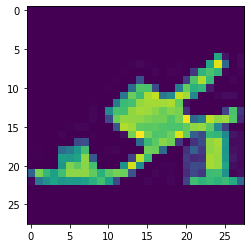

In [8]:
# lets see what a random image look like 

image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

# Dimensionality reduction
## Dimensionality reduction using PCA
PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. <br/>       These newly extracted variables are called Principal Components. 

In [20]:
# we will only sample the first 20,000 so as to not burden the computer
x_subset = x_train[0:20000]
y_subset = y_train[0:20000]

In [ ]:
feat_cols = [ 'pixel'+str(i) for i in range(x_train.shape[1]) ]
df = pd.DataFrame(x_train,columns=feat_cols)
df['y_train'] = y_train
df['label'] = df['y_train'].apply(lambda i: str(i))
#x_train, y_train = None, None
print('Size of the dataframe: {}'.format(df.shape))
#[out] Size of the dataframe: (70000, 785)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [ ]:
#x_train.shape

In [ ]:
#df[feat_cols]

In [ ]:
#x_train

In [ ]:
#train_df

In [ ]:
plt.style.use('default')

fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap='gray_r')
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

plt.suptitle('2-Component PCA')

In [ ]:
index = np.arange(len(pca.explained_variance_ratio_))
plt.figure(figsize=(14,6))
plt.title('Principal Component Analysis')
plt.bar(index, pca.explained_variance_ratio_*100)
plt.xlabel('Principal Component', fontsize=10)
plt.ylabel('Explained Variance', fontsize=10)
plt.xticks(index, pca.explained_variance_ratio_*100, fontsize=10, rotation=30)
plt.show()

## Dimensionality reduction using t-SNE
t - Distributed Stochastic Neighbor Embedding (t-SNE)

In [19]:
from sklearn.manifold import TSNE
# we will only sample the first 20,000 so as to not burden the computer
x_subset = x_train[0:20000]
y_subset = y_train[0:20000]
# or to use x_train[:n_tsne2]
y_subset.shape

(20000,)

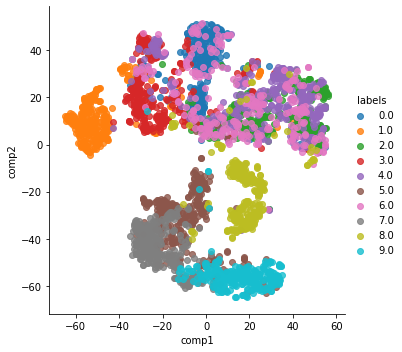

In [12]:
# t-sne alone 
n_tsne2 = 3000

tsne = TSNE(n_components=2,n_iter=1000)
tsne_alone = tsne.fit_transform(x_train[:n_tsne2])

#Create a data frame
Xdf = pd.DataFrame(tsne_alone)
Xdf.columns = ['comp1','comp2']
Xdf['labels'] = y_train[:n_tsne2]
sns.lmplot('comp1','comp2',hue='labels',data=Xdf,fit_reg=False)

## PCA & t-SNE
Scikit-learn's documentation of t-SNE explicitly states that:

It is highly recommended to use another dimensionality reduction method (e.g., PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g., 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.

In [ ]:
#PCA AND T-SNE

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_train)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

In [ ]:
#reducing the amont of pictures to ease the caculation process 
n_tsne = 1000
pca_result_50[:n_tsne].shape

In [18]:
n_tsne = 1000
x_train[:n_tsne].shape

(1000, 784)

In [ ]:
pca_result_50.shape

In [ ]:
tsne = TSNE(n_components=3,n_iter=1000)
X_valid_2D = tsne.fit_transform(pca_result_50[:n_tsne])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], X_valid_2D[:, 2], c=y_train[:n_tsne], s=10, cmap="tab10")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


plt.show()

In [17]:
y_train[:n_tsne2].shape

(3000,)

In [ ]:
X_valid_2D.shape X_valid_2D

In [ ]:
df_subset['tsne-2d-one'] = X_valid_2D[:,0]
df_subset['tsne-2d-two'] = X_valid_2D[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [15]:
x_subset = x_train[0:20000]
x_subset.shape

(20000, 784)